# Artificial Intelligence exam project

Initial imports:

In [1]:
import matplotlib.pyplot as plt
import IPython.display as display
from utils import *
from heuristic_FD import *

In [2]:
state = env.reset()
env.render() 
print(env.actions)


Hello Agent, welcome to NetHack!  You are a lawful human Caveman.               
                                --------------------                            
                                |.................k|                            
                                |.@...............k|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |).................|                            
                                |..................|                            
                                |..................|                            
                           

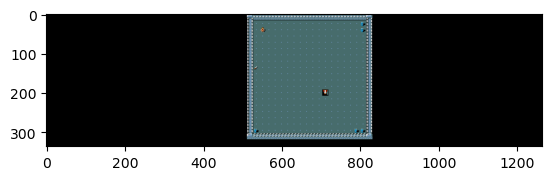

In [3]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [4]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
weapons = get_weapon_location(game_map)
print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))
print("Weapon position:", weapons)
print("Other actions:", OTHER_ACTIONS[8])
print("Other actions:", OTHER_ACTIONS[9])

Agent position: (2, 34)
Target position: (12, 44)
Monster position: [(1, 50), (2, 50), (18, 33), (18, 49), (18, 50)]
Weapon position: [(8, 33)]
Other actions: Command.PICKUP
Other actions: Command.WIELD


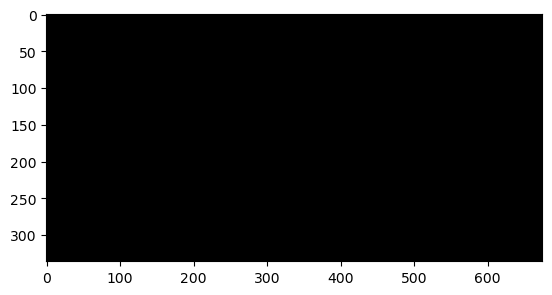

In [5]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

end_state = False # end state of the game
hp = 16 # initial hp
max_hp = 16 # initial max hp
weapon_in_hand = False # initial weapon in hand

while not end_state:

    current_position = get_player_location(game_map)

    if not(weapon_in_hand) and weapons and current_position == weapons[0]: # if i'm on a weapon
        pickup() # pick up the weapon
        wield() # wield it
        weapon_in_hand = True 
        #print("Weapon in hand: ", weapon_in_hand) # debug

    hp_percent = hp/max_hp
    #print(hp_percent) # debug

    coord = get_best_move(game_map, current_position, end_target, heuristic_fd, hp_percent, weapon_in_hand) #get the best move according to the heuristic
    #print("Best move: ", coord) #debug

    # print updated step
    game_map, x, end_state, y = env.step(actions_from_path(current_position,[coord])[0])

    # update hp
    hp = game_map["blstats"][10]
    max_hp = game_map["blstats"][11]
    print("HP: " + "[" + "*" * hp + "-" * (max_hp-hp) + "]") # print hp bar

    # plot map
    game_map = plot_map(game_map,image)
    player_moves.append(coord)